<a href="https://colab.research.google.com/github/Muthuuk/AI-Powered-Commerce/blob/main/Urology_ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚀 Initializing OAB/IC/BPS AI Analytics Pipeline...


Saving OAB UKBio Bank Template Synthetic Datasets.csv to OAB UKBio Bank Template Synthetic Datasets.csv
Dataset loaded successfully!
Shape: (46, 12)
Columns: ['Patient_ID', 'Age', 'Sex', 'Frequency_Score', 'Urgency_Score', 'Nocturia_Score', 'Pain_Score', 'QoL_Impact_Score', 'OAB_Diagnosis', 'IC_BPS_Diagnosis', 'Treatment_Type', 'Response_To_Treatment']
📊 Using provided dataset for analysis...
🔧 Advanced data preprocessing...
🤖 Training machine learning models...
Training RandomForest...
RandomForest training complete.
Training GradientBoosting...
GradientBoosting training complete.
Training ExtraTrees...
ExtraTrees training complete.
Training SVC...
SVC training complete.
Training MLPClassifier...
MLPClassifier training complete.
Training LogisticRegression...
LogisticRegression training complete.
Training GaussianNB...
GaussianNB training complete.
Training KNeighbors...
KNeighbors training complete.
Training DecisionTree...
DecisionTree training complete.
📈 Generating visualizations.

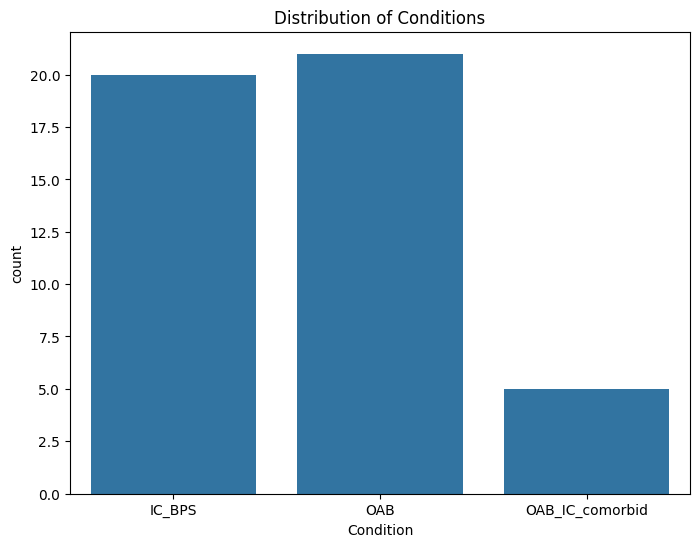

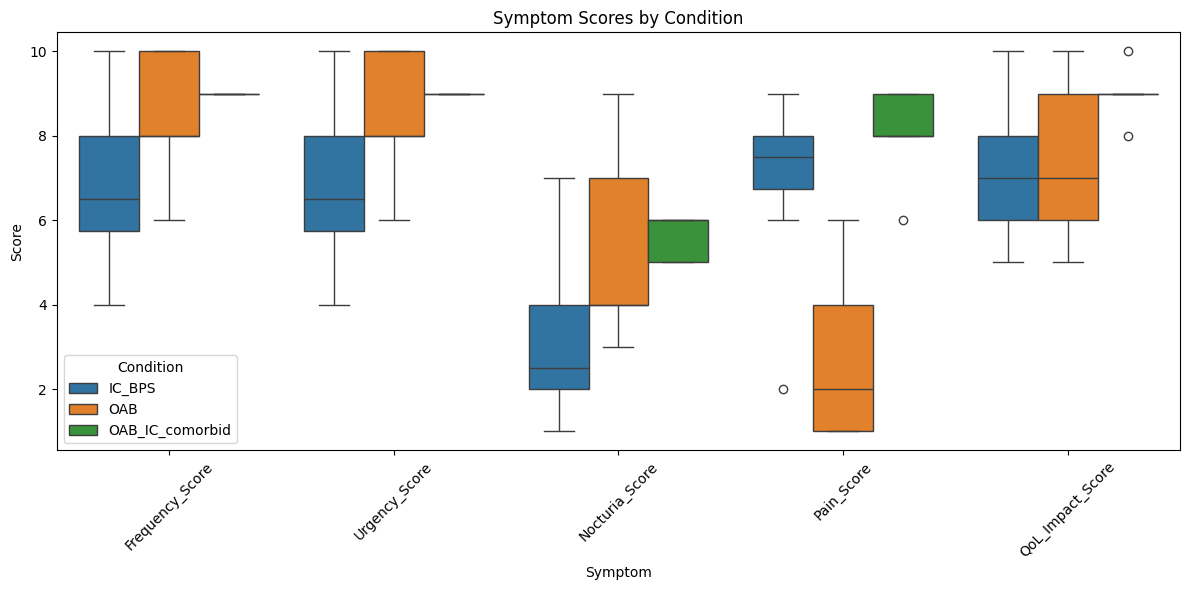

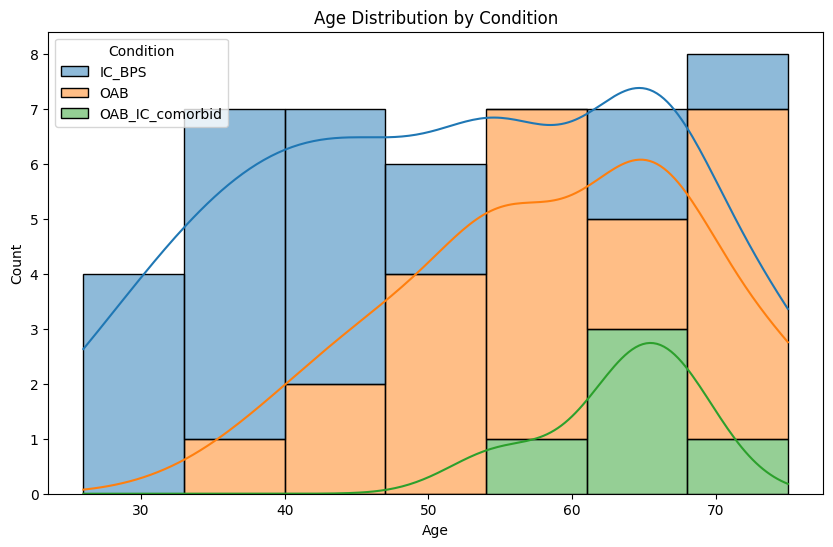

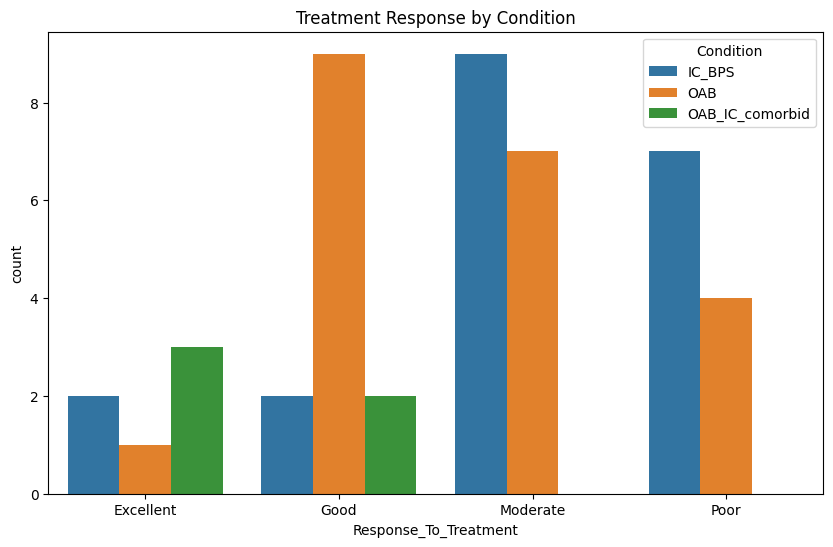

Generating model performance visualizations...


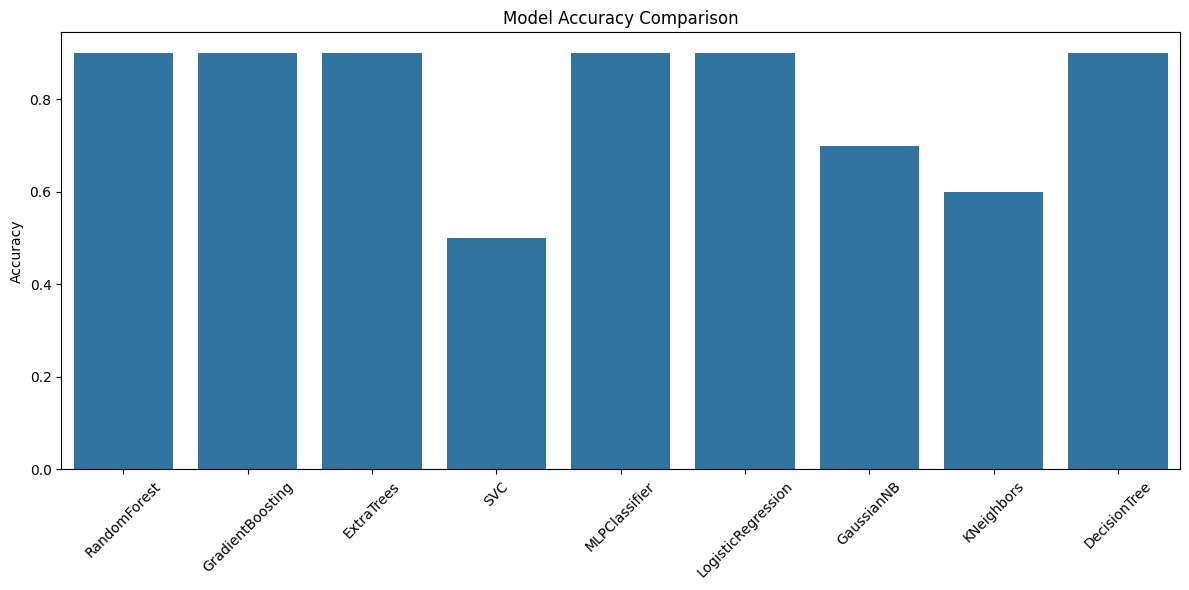

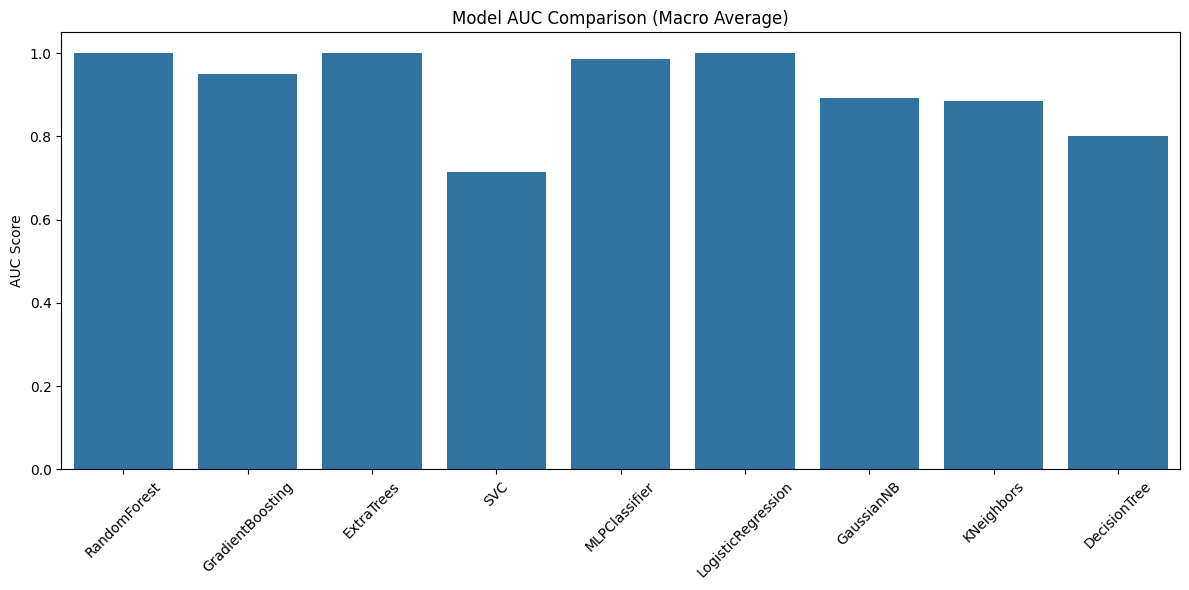

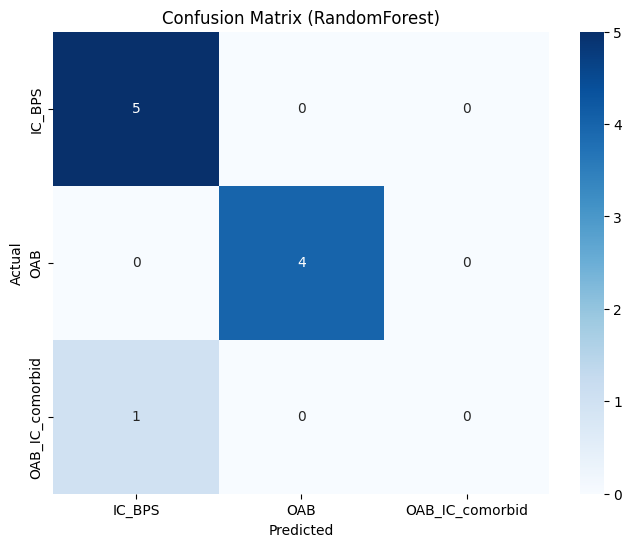

Visualizations generated.

==== Interactive Diagnosis and Recommendations ====
Please provide the following information:
Enter patient age: 65
Enter patient sex (Male/Female): M
Enter Frequency Score (0-10): 8
Enter Urgency Score (0-10): 7
Enter Nocturia Score (0-10): 6
Enter Pain Score (0-10): 8
Enter Quality of Life Impact Score (0-10): 8

Predicted Condition: IC_BPS

Recommended Treatment Protocol for IC_BPS:
  First Line: Diet modification, Stress management
  Medications: Elmiron, Pentosan Polysulfate, Amitriptyline
  Procedures: Bladder instillations, Hydrodistension
  Evidence Level: B
  Suggested Follow-up: 8 weeks

Relevant Medical Database Information:
❌ Error in pipeline: no such table: medications


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import sqlite3
import json
from datetime import datetime, timedelta
import warnings
import os

# Suppress warnings
warnings.filterwarnings('ignore')

# ====================== MEDICAL DATABASE CLASS ======================
class MedicalDatabase:
    """Medical database integration for OAB/IC conditions"""

    def __init__(self, db_path=":memory:"):  # Using in-memory database for Colab
        self.db_path = db_path
        self.init_database()

    def init_database(self):
        """Initialize medical database with comprehensive data"""
        conn = sqlite3.connect(self.db_path)
        cursor = conn.cursor()

        # Create tables
        cursor.execute('''
            CREATE TABLE IF NOT EXISTS medications (
                id INTEGER PRIMARY KEY,
                name TEXT NOT NULL,
                class TEXT NOT NULL,
                mechanism TEXT,
                dosage TEXT,
                side_effects TEXT,
                contraindications TEXT,
                efficacy_score REAL,
                condition_target TEXT
            )
        ''')

        cursor.execute('''
            CREATE TABLE IF NOT EXISTS procedures (
                id INTEGER PRIMARY KEY,
                name TEXT NOT NULL,
                type TEXT NOT NULL,
                description TEXT,
                success_rate REAL,
                complications TEXT,
                recovery_time TEXT,
                cost_range TEXT,
                condition_target TEXT
            )
        ''')

        cursor.execute('''
            CREATE TABLE IF NOT EXISTS specialists (
                id INTEGER PRIMARY KEY,
                name TEXT NOT NULL,
                specialty TEXT NOT NULL,
                subspecialty TEXT,
                location TEXT,
                rating REAL,
                years_experience INTEGER,
                phone TEXT,
                email TEXT,
                conditions_treated TEXT
            )
        ''')

        # Insert sample data
        self.populate_sample_data(cursor)
        conn.commit()
        conn.close()

    def populate_sample_data(self, cursor):
        """Populate database with comprehensive medical data"""
        # Medications data
        medications_data = [
            ('Mirabegron', 'Beta-3 agonist', 'Relaxes detrusor muscle', '25-50mg daily',
             'Hypertension, nasopharyngitis', 'Severe hypertension', 7.5, 'OAB'),
            ('Oxybutynin', 'Anticholinergic', 'Blocks muscarinic receptors', '5-15mg daily',
             'Dry mouth, constipation', 'Narrow-angle glaucoma', 6.8, 'OAB'),
            ('Solifenacin', 'Anticholinergic', 'M3 receptor antagonist', '5-10mg daily',
             'Dry mouth, blurred vision', 'Gastric retention', 7.2, 'OAB'),
            ('Pentosan polysulfate', 'Glycosaminoglycan', 'Bladder wall protection', '100mg TID',
             'GI upset, alopecia', 'Bleeding disorders', 6.5, 'IC'),
            ('Amitriptyline', 'Tricyclic antidepressant', 'Pain modulation', '25-75mg daily',
             'Sedation, weight gain', 'Heart block', 7.0, 'IC')
        ]

        cursor.executemany('''
            INSERT INTO medications
            (name, class, mechanism, dosage, side_effects, contraindications, efficacy_score, condition_target)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        ''', medications_data)

        # Procedures data
        procedures_data = [
            ('Botulinum Toxin Injection', 'Minimally Invasive', 'Intravesical botulinum toxin injection',
             85.0, 'UTI, retention', '2-3 days', '$3000-5000', 'OAB'),
            ('Sacral Neuromodulation', 'Surgical', 'Implantable device for nerve stimulation',
             78.0, 'Infection, lead migration', '1-2 weeks', '$15000-25000', 'OAB'),
            ('Bladder Instillation', 'Minimally Invasive', 'Direct medication into bladder',
             60.0, 'UTI, bladder spasm', 'Same day', '$500-1000', 'IC')
        ]

        cursor.executemany('''
            INSERT INTO procedures
            (name, type, description, success_rate, complications, recovery_time, cost_range, condition_target)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        ''', procedures_data)

        # Specialists data
        specialists_data = [
            ('Dr. Sarah Mitchell', 'Urology', 'Female Pelvic Medicine', 'New York, NY',
             4.8, 15, '555-0101', 'smitchell@hospital.com', 'OAB,IC,Pelvic Pain'),
            ('Dr. James Rodriguez', 'Urology', 'Neurourology', 'Los Angeles, CA',
             4.9, 20, '555-0102', 'jrodriguez@medical.com', 'Neurogenic Bladder,OAB')
        ]

        cursor.executemany('''
            INSERT INTO specialists
            (name, specialty, subspecialty, location, rating, years_experience, phone, email, conditions_treated)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
        ''', specialists_data)

    def get_medications(self, condition):
        """Retrieve medications for specific condition"""
        conn = sqlite3.connect(self.db_path)
        cursor = conn.cursor()
        cursor.execute('''
            SELECT * FROM medications
            WHERE condition_target LIKE ?
            ORDER BY efficacy_score DESC
        ''', (f'%{condition}%',))
        results = cursor.fetchall()
        conn.close()
        return results

    def get_procedures(self, condition):
        """Retrieve procedures for specific condition"""
        conn = sqlite3.connect(self.db_path)
        cursor = conn.cursor()
        cursor.execute('''
            SELECT * FROM procedures
            WHERE condition_target LIKE ?
            ORDER BY success_rate DESC
        ''', (f'%{condition}%',))
        results = cursor.fetchall()
        conn.close()
        return results

    def get_specialists(self, condition=None, location=None):
        """Retrieve specialists based on condition and location"""
        conn = sqlite3.connect(self.db_path)
        cursor = conn.cursor()

        query = "SELECT * FROM specialists WHERE 1=1"
        params = []

        if condition:
            query += " AND conditions_treated LIKE ?"
            params.append(f'%{condition}%')

        if location:
            query += " AND location LIKE ?"
            params.append(f'%{location}%')

        query += " ORDER BY rating DESC, years_experience DESC"

        cursor.execute(query, params)
        results = cursor.fetchall()
        conn.close()
        return results

# ====================== DATA LOADER CLASS ======================
class DataLoader:
    """Class to load and preprocess the OAB UKBio Bank dataset"""

    def __init__(self, filepath=None):
        self.filepath = filepath

    def load_data(self):
        """Load the dataset from the specified path"""
        try:
            df = pd.read_csv(self.filepath)
            print("Dataset loaded successfully!")
            print(f"Shape: {df.shape}")
            print("Columns:", df.columns.tolist())
            return df
        except Exception as e:
            print(f"Error loading dataset: {e}")
            return None

    def preprocess_data(self, df):
        """Preprocess the dataset for analysis"""
        if df is None:
            return None

        # Clean column names by removing backslashes
        df.columns = df.columns.str.replace('\\', '')

        # Handle missing values
        df.fillna(method='ffill', inplace=True)

        # Convert columns to appropriate types
        numeric_cols = ['Age', 'Frequency_Score', 'Urgency_Score',
                       'Nocturia_Score', 'Pain_Score', 'QoL_Impact_Score']

        for col in numeric_cols:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce')

        # Create combined diagnosis column
        conditions = []
        for _, row in df.iterrows():
            if row['OAB_Diagnosis'] == 'Yes' and row['IC_BPS_Diagnosis'] == 'Yes':
                conditions.append('OAB_IC_comorbid')
            elif row['OAB_Diagnosis'] == 'Yes':
                conditions.append('OAB')
            elif row['IC_BPS_Diagnosis'] == 'Yes':
                conditions.append('IC_BPS')
            else:
                conditions.append('None')

        df['Condition'] = conditions

        # Encode categorical variables
        categorical_cols = ['Sex', 'Treatment_Type', 'Response_To_Treatment', 'Condition']
        for col in categorical_cols:
            if col in df.columns:
                df[col] = df[col].astype('category')

        return df

# ====================== MAIN PIPELINE CLASS ======================
class AdvancedOABICPipeline:
    """Enhanced OAB/IC AI pipeline with advanced features"""

    def __init__(self, data_loader=None):
        self.models = {}
        self.scalers = {}
        self.label_encoders = {}
        self.pca = None
        self.kmeans = None
        self.medical_db = MedicalDatabase()  # Now properly defined
        self.data_loader = data_loader or DataLoader()

        # Initialize with your dataset
        self.df = self.data_loader.load_data()
        if self.df is not None:
            self.df = self.data_loader.preprocess_data(self.df)

        # Enhanced symptom weights with temporal factors
        self.symptom_weights = {
            'Urgency': 0.25,
            'Frequency': 0.20,
            'Nocturia': 0.15,
            'Pain': 0.25,
            'QoL_Impact': 0.15
        }

        # Condition categories mapping
        self.condition_categories = {
            'OAB related': {
                'symptoms': ['Urgency', 'Frequency', 'Nocturia'],
                'conditions': ['OAB']
            },
            'IC/BPS related': {
                'symptoms': ['Pain', 'Urgency', 'Frequency'],
                'conditions': ['IC_BPS']
            },
            'Comorbid OAB-IC/BPS': {
                'symptoms': ['Urgency', 'Frequency', 'Pain', 'Nocturia'],
                'conditions': ['OAB_IC_comorbid']
            }
        }

        # Treatment protocols
        self.treatment_protocols = {
            'OAB': {
                'first_line': ['Behavioral therapy', 'Bladder training'],
                'medications': ['Mirabegron', 'Tolterodine', 'Solifenacin', 'Oxybutynin'],
                'procedures': ['Botox injections', 'PTNS'],
                'evidence_level': 'A',
                'followup_weeks': 6
            },
            'IC_BPS': {
                'first_line': ['Diet modification', 'Stress management'],
                'medications': ['Elmiron', 'Pentosan Polysulfate', 'Amitriptyline'],
                'procedures': ['Bladder instillations', 'Hydrodistension'],
                'evidence_level': 'B',
                'followup_weeks': 8
            },
            'OAB_IC_comorbid': {
                'first_line': ['Combined behavioral approaches'],
                'medications': ['Mirabegron + Elmiron', 'Solifenacin + Amitriptyline'],
                'procedures': ['Combination therapy'],
                'evidence_level': 'B',
                'followup_weeks': 4
            }
        }

    def advanced_preprocessing(self, df):
        """Perform advanced preprocessing steps including scaling, encoding, and PCA"""
        if df is None:
            print("Error: DataFrame is None in advanced_preprocessing.")
            return None, None, None, None, None

        # Select features and target
        feature_cols = ['Age', 'Sex', 'Frequency_Score', 'Urgency_Score',
                        'Nocturia_Score', 'Pain_Score', 'QoL_Impact_Score',
                        'Treatment_Type', 'Response_To_Treatment']
        target_col = 'Condition'

        # Ensure all feature columns exist
        missing_cols = [col for col in feature_cols if col not in df.columns]
        if missing_cols:
            print(f"Error: Missing feature columns: {missing_cols}")
            return None, None, None, None, None

        X = df[feature_cols].copy()
        y = df[target_col].copy()

        # Handle categorical features
        for col in ['Sex', 'Treatment_Type', 'Response_To_Treatment']:
            if col in X.columns:
                self.label_encoders[col] = LabelEncoder()
                X[col] = self.label_encoders[col].fit_transform(X[col])

        # Separate numerical and categorical columns for scaling
        numeric_features = ['Age', 'Frequency_Score', 'Urgency_Score',
                            'Nocturia_Score', 'Pain_Score', 'QoL_Impact_Score']
        categorical_features = ['Sex', 'Treatment_Type', 'Response_To_Treatment']

        # Standard Scaling
        self.scalers['standard'] = StandardScaler()
        X_standard = X.copy()
        X_standard[numeric_features] = self.scalers['standard'].fit_transform(X_standard[numeric_features])

        # Min-Max Scaling
        self.scalers['minmax'] = MinMaxScaler()
        X_minmax = X.copy()
        X_minmax[numeric_features] = self.scalers['minmax'].fit_transform(X_minmax[numeric_features])

        # PCA (on Standard Scaled data)
        self.pca = PCA(n_components=min(X_standard.shape[0], X_standard.shape[1]))
        X_pca = self.pca.fit_transform(X_standard)

        # Encode target variable
        self.label_encoders[target_col] = LabelEncoder()
        y_encoded = self.label_encoders[target_col].fit_transform(y)

        return X_standard, X_minmax, X_pca, y_encoded, feature_cols

    def train_advanced_models(self, X_standard, X_minmax, X_pca, y):
        """Train various advanced machine learning models and evaluate them"""
        if X_standard is None or y is None:
            print("Error: Input data for training is None.")
            return {}

        # Split data
        X_train_std, X_test_std, y_train, y_test = train_test_split(X_standard, y, test_size=0.2, random_state=42)
        X_train_minmax, X_test_minmax, _, _ = train_test_split(X_minmax, y, test_size=0.2, random_state=42)
        X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

        # Define models
        models = {
            'RandomForest': RandomForestClassifier(random_state=42),
            'GradientBoosting': GradientBoostingClassifier(random_state=42),
            'ExtraTrees': ExtraTreesClassifier(random_state=42),
            'SVC': SVC(probability=True, random_state=42),
            'MLPClassifier': MLPClassifier(random_state=42, max_iter=1000),
            'LogisticRegression': LogisticRegression(random_state=42),
            'GaussianNB': GaussianNB(),
            'KNeighbors': KNeighborsClassifier(),
            'DecisionTree': DecisionTreeClassifier(random_state=42)
        }

        results = {}

        for name, model in models.items():
            print(f"Training {name}...")
            X_train = X_train_std
            X_test = X_test_std
            if name == 'SVC':
                X_train = X_train_minmax
                X_test = X_test_minmax
            elif name in ['GaussianNB', 'KNeighbors']:
                 X_train = X_train_pca
                 X_test = X_test_pca


            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_proba = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

            report = classification_report(y_test, y_pred, output_dict=True)
            cm = confusion_matrix(y_test, y_pred)
            try:
                # Calculate AUC for each class and average (macro)
                auc_score = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro') if y_proba is not None else None
            except ValueError as e:
                print(f"Could not calculate AUC for {name}: {e}")
                auc_score = None


            results[name] = {
                'report': report,
                'confusion_matrix': cm,
                'auc_score': auc_score,
                'model': model
            }
            print(f"{name} training complete.")

        return results

    def create_visualizations(self, df, model_results):
        """Generate various visualizations for data exploration and model performance"""
        if df is None:
            print("Error: DataFrame is None for visualizations.")
            return

        print("Generating data visualizations...")

        # 1. Distribution of Conditions
        plt.figure(figsize=(8, 6))
        sns.countplot(x='Condition', data=df)
        plt.title('Distribution of Conditions')
        plt.show()

        # 2. Symptom Scores by Condition
        symptom_cols = ['Frequency_Score', 'Urgency_Score', 'Nocturia_Score', 'Pain_Score', 'QoL_Impact_Score']
        df_melted = df.melt(id_vars=['Condition'], value_vars=symptom_cols, var_name='Symptom', value_name='Score')

        plt.figure(figsize=(12, 6))
        sns.boxplot(x='Symptom', y='Score', hue='Condition', data=df_melted)
        plt.title('Symptom Scores by Condition')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # 3. Age Distribution by Condition
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x='Age', hue='Condition', multiple='stack', kde=True)
        plt.title('Age Distribution by Condition')
        plt.show()

        # 4. Treatment Response by Condition
        plt.figure(figsize=(10, 6))
        sns.countplot(x='Response_To_Treatment', hue='Condition', data=df)
        plt.title('Treatment Response by Condition')
        plt.show()

        print("Generating model performance visualizations...")

        if model_results:
            # 5. Model Accuracy Comparison
            accuracies = {name: result['report']['accuracy'] for name, result in model_results.items() if 'accuracy' in result['report']}
            if accuracies:
                plt.figure(figsize=(12, 6))
                sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
                plt.title('Model Accuracy Comparison')
                plt.xticks(rotation=45)
                plt.ylabel('Accuracy')
                plt.tight_layout()
                plt.show()

            # 6. Model AUC Comparison
            auc_scores = {name: result['auc_score'] for name, result in model_results.items() if result['auc_score'] is not None}
            if auc_scores:
                plt.figure(figsize=(12, 6))
                sns.barplot(x=list(auc_scores.keys()), y=list(auc_scores.values()))
                plt.title('Model AUC Comparison (Macro Average)')
                plt.xticks(rotation=45)
                plt.ylabel('AUC Score')
                plt.tight_layout()
                plt.show()

            # 7. Confusion Matrix for a selected model (e.g., RandomForest)
            if 'RandomForest' in model_results and model_results['RandomForest']['confusion_matrix'] is not None:
                cm = model_results['RandomForest']['confusion_matrix']
                class_labels = self.label_encoders['Condition'].classes_
                plt.figure(figsize=(8, 6))
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                            xticklabels=class_labels, yticklabels=class_labels)
                plt.title('Confusion Matrix (RandomForest)')
                plt.xlabel('Predicted')
                plt.ylabel('Actual')
                plt.show()

        print("Visualizations generated.")

    def enhanced_interactive_diagnosis(self):
        """Provide interactive diagnosis and treatment recommendations"""
        print("\n==== Interactive Diagnosis and Recommendations ====")
        print("Please provide the following information:")

        age = int(input("Enter patient age: "))
        sex = input("Enter patient sex (Male/Female): ")
        frequency = int(input("Enter Frequency Score (0-10): "))
        urgency = int(input("Enter Urgency Score (0-10): "))
        nocturia = int(input("Enter Nocturia Score (0-10): "))
        pain = int(input("Enter Pain Score (0-10): "))
        qol_impact = int(input("Enter Quality of Life Impact Score (0-10): "))

        # Create a dictionary for the new patient data with all feature columns
        new_patient_data = {col: None for col in self.feature_cols}
        new_patient_data.update({
            'Age': age,
            'Sex': sex,
            'Frequency_Score': frequency,
            'Urgency_Score': urgency,
            'Nocturia_Score': nocturia,
            'Pain_Score': pain,
            'QoL_Impact_Score': qol_impact,
        })

        # Convert to DataFrame
        new_patient_df = pd.DataFrame([new_patient_data])

        # Fill missing categorical values with mode from training data
        for col in ['Sex', 'Treatment_Type', 'Response_To_Treatment']:
            if col in new_patient_df.columns and col in self.label_encoders:
                # Use the mode from the original training data to fill missing values
                mode_value = self.df[col].mode()[0]
                new_patient_df[col] = new_patient_df[col].fillna(mode_value)
                # Handle unseen labels during transformation
                new_patient_df[col] = new_patient_df[col].apply(lambda x: x if x in self.label_encoders[col].classes_ else self.label_encoders[col].classes_[0])
                new_patient_df[col] = self.label_encoders[col].transform(new_patient_df[col])


        numeric_features = ['Age', 'Frequency_Score', 'Urgency_Score',
                            'Nocturia_Score', 'Pain_Score', 'QoL_Impact_Score']

        if self.scalers.get('standard'):
            new_patient_df[numeric_features] = self.scalers['standard'].transform(new_patient_df[numeric_features])

        # Predict condition using the best model (e.g., RandomForest)
        best_model_name = 'RandomForest' # Or determine based on evaluation results
        if best_model_name in self.models:
            # Ensure the new patient DataFrame has the same columns in the same order as the training data
            if hasattr(self, 'feature_cols') and self.feature_cols is not None:
                 new_patient_df = new_patient_df[self.feature_cols].copy()


            predicted_condition_encoded = self.models[best_model_name].predict(new_patient_df)
            predicted_condition = self.label_encoders['Condition'].inverse_transform(predicted_condition_encoded)[0]
            print(f"\nPredicted Condition: {predicted_condition}")

            # Provide treatment recommendations based on predicted condition
            if predicted_condition in self.treatment_protocols:
                protocol = self.treatment_protocols[predicted_condition]
                print(f"\nRecommended Treatment Protocol for {predicted_condition}:")
                print(f"  First Line: {', '.join(protocol['first_line'])}")
                print(f"  Medications: {', '.join(protocol['medications'])}")
                print(f"  Procedures: {', '.join(protocol['procedures'])}")
                print(f"  Evidence Level: {protocol['evidence_level']}")
                print(f"  Suggested Follow-up: {protocol['followup_weeks']} weeks")

                # Retrieve and display relevant medical database information
                print("\nRelevant Medical Database Information:")
                medications = self.medical_db.get_medications(predicted_condition)
                if medications:
                    print("\n--- Medications ---")
                    for med in medications:
                         print(f"Name: {med[1]}, Class: {med[2]}, Efficacy Score: {med[7]}")
                else:
                    print("\n--- No relevant medications found ---")

                procedures = self.medical_db.get_procedures(predicted_condition)
                if procedures:
                    print("\n--- Procedures ---")
                    for proc in procedures:
                         print(f"Name: {proc[1]}, Type: {proc[2]}, Success Rate: {proc[4]}%")
                else:
                     print("\n--- No relevant procedures found ---")

                # Ask for location to find specialists
                location = input("\nEnter your location (e.g., New York, NY) to find specialists: ")
                specialists = self.medical_db.get_specialists(condition=predicted_condition, location=location)
                if specialists:
                    print(f"\n--- Specialists in {location} treating {predicted_condition} ---")
                    for spec in specialists:
                         print(f"Name: {spec[1]}, Specialty: {spec[2]}, Rating: {spec[5]}, Years Experience: {spec[6]}")
                else:
                    print(f"\n--- No specialists found in {location} treating {predicted_condition} ---")

            else:
                print("No specific treatment protocol found for the predicted condition.")

        else:
            print(f"Error: Best model '{best_model_name}' not found. Cannot perform interactive diagnosis.")


# ====================== MAIN EXECUTION ======================
def main():
    """Main function to run the pipeline"""
    print("🚀 Initializing OAB/IC/BPS AI Analytics Pipeline...")

    # First upload your file in Colab
    from google.colab import files
    uploaded = files.upload()
    filename = next(iter(uploaded))

    # Initialize pipeline with the uploaded file
    pipeline = AdvancedOABICPipeline(DataLoader(filename))

    # Check if dataset was loaded
    if pipeline.df is not None:
        print("📊 Using provided dataset for analysis...")
        df = pipeline.df
    else:
        print("❌ No dataset available. Please check the file path.")
        return

    # Advanced preprocessing
    print("🔧 Advanced data preprocessing...")
    try:
        X_standard, X_minmax, X_pca, y, feature_cols = pipeline.advanced_preprocessing(df)
        # Store feature_cols for later use in interactive diagnosis
        pipeline.feature_cols = feature_cols

        # Train models
        print("🤖 Training machine learning models...")
        results = pipeline.train_advanced_models(X_standard, X_minmax, X_pca, y)
        # Store models
        pipeline.models = {name: result['model'] for name, result in results.items()}


        # Create visualizations
        print("📈 Generating visualizations...")
        pipeline.create_visualizations(df, results)

        # Interactive diagnosis
        pipeline.enhanced_interactive_diagnosis()

    except Exception as e:
        print(f"❌ Error in pipeline: {e}")

if __name__ == "__main__":
    main()